![](Cover_page.png)


# Bike Sharing Analytics

------------------------------------------------------------------------------
----

# Contents <a id="top"></a>

#### 1. [Introduction](#part1) 
   - [1.1 Background](#part1.1) 
   - [1.2 Project objectives](#part1.2) 
   - [1.3 Project objectives](#part1.3) 
   - [1.4 exploratory questions](#part1.4)  
#### 2. [Data preparation](#part2)
- [2.1 Checking Outliers](#2.1)
- [2.2 Checking Datatype](#2.2)

#### 3. [Visualisations](#part3)
- [3.1 Pertaining to the overall bike rental distribution](#vizcat1)
- [3.2 Pertaining to the weather conditions and seasons](#vizcat2)
- [3.3 Pertaining to temporal analysis](#vizcat3)
 
#### 4. [Dashboard](#part4)
- [4.1 Overall distribution of bike rental](#dashboard1) 
- [4.2 Overall bike rental patterns of casual and registered users](#dashboard2) 
- [4.3 Temporal analysis of bike rentals for casual and registered users](#dashboard3) 
- [4.4 Relationship between bike counts, seasons and weather situation](#dashboard4) 

#### 5. [Conclusion](#part5)
#### 6. [Reflection](#part6)
#### 7. [References](#part7)

# 1. Introduction <a id="part1"></a>
[Back to top](#top)

###  1.1 Background <a id="part1.1"></a> 

With an growing emphasis on reduction of traffic congestions, evironmental problems and health-related concerns, it has led to an increased interest in bike-sharing systems. These systems automate the entire process of membership, rental, and return, responding to the heightened demand. 

Today, there are over 500 bike-sharing programms worldwide, with over 500 thousand bicycles for sharing. Besides improving urban mobility, bike sharing programs are also a powerful tool for data collection. By tracking the movements of these bicycles, a virtual sensing network is formed, where the mobility patterns in the city can be monitored. Therefore, not only does it function as a sustainable transportation tool, but the data generated from tracking bike movements is also valuable for understanding urban mobility patterns. 

To ensure the continued success of this system, improvements and upgrades are necessary to sustain business operation and to keep it in line with current trends and demands.

###  1.2 Problems Statement <a id="part1.2"></a> 


In this project, we aim to address the following problem: How do environmental factors, including holidays, seasonal variations, and weather changes, impact the number of bike rentals? Our goal is to thoroughly examine and understand the relationship between these factors and bike rental patterns.


###  1.3 Project Objectives <a id="part1.2"></a> 

As a member of the market research team for Leo Bike Share Co, the objective of this project is to find out the variation in consumer behavior by studying bike rental patterns and provide data driven suggestions that will help improve business operation for Leo Bike.


###  1.4 Exploratory Questions <a id="part1.3"></a> 
[Back to top](#top)

#### 1.[Pertaining to the overall bike rental distribution](#vizcat1)
   - a) How is the overall bike rental distributed over 2011 and 2012?
   - b) How is the bike rental distributed by season? 
   - c) What is the portion of Casual users to Registered users?
   - d) How did the demographics change when comparing 2011 and 2012?                               
#### 2.[Pertaining to the weather conditions and seasons](#vizcat2)
   - a) What is the relationship between temperature and bike rentals? 
   - b) How do different weather conditions affect the number of bike rentals and the type of users? 
   - c) How has the demand for bike rental changed across different seasons? 
   - d) How does windspeed and humidity affect the bike rental counts? 
   - e) How do the weather conditions differ across months with different seasons? 
   - f) What is the impact of weather condition and bike rental numbers?

   
#### 3. [Pertaining to temporal analysis](#vizcat3)
   - a) How has the demand in bike rental changed across different months and how is it affected by the temperatures?
   - b) How does holiday and working days  impact on the number of rental counts? 
   - c) How does the bike rental patterns differ for casual and registered users throughout the week? 



-----
# 2. Data Preparation <a id="part2"></a>
[Back to top](#top)

##### Importing libraries: 

In [1]:
# Import NumPy and Pandas libraries
import numpy as np
import pandas as pd


# Import libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns



 ##### Load data:

In [2]:
# Load bike sharing data into a pandas dataframe from a csv file
filename = 'BikeSharing Dataset.csv'
df = pd.read_csv(filename)

##### 2.1 Checking outliers: <a id="2.1"></a>

In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.311067,23.717880,62.790082,12.762654,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505145,8.147998,14.242994,5.192157,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


Upon examining the table, the minimum humidity appears to be 0.00. It is not normal for a natural environment to have 0 humidity. Hence corrections is required.

In [4]:
#Replacing 0 humidity with median 
df['Humidity'] = df['hum'] #creating a new column for a copy of humidity
median = df['Humidity'].median() # finding the median of the humidity\
df['Humidity'].replace(0.0, median, inplace=True) # correcting the median value by replacing 

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Humidity
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.311067,23.717880,62.790082,12.762654,848.176471,3656.172367,4504.348837,62.875814
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505145,8.147998,14.242994,5.192157,686.622488,1560.256377,1937.211452,14.051858
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000,18.790000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820000,16.895000,52.000000,9.040000,315.500000,2497.000000,3152.000000,52.105000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.430000,24.340000,62.670000,12.130000,713.000000,3662.000000,4548.000000,62.670000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.875000,30.430000,73.020000,15.625000,1096.000000,4776.500000,5956.000000,73.020000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000,97.250000


0.0 Humidity has been corrected using the median in 'Humidity' column.

##### 2.2 Checking for data type: <a id="2.2"></a>

In [5]:
#check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  Humidity    731 non-null    float64
dtypes: float64(5), int64(11), object(1)
memory usage: 97.2+ KB


In [6]:
#converting the date to datetime type
df['dteday'] = pd.to_datetime(df['dteday'], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  Humidity    731 non-null  

The dataset given is complete and there are no missing values

In [7]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Humidity      0
dtype: int64


##### Shape of the data frame: 

In [8]:
df.shape

(731, 17)

# 3. Visualisations <a id="part3"></a>
[Back to top](#top)

### 3.1 Pertaining to the overall bike rental distribution <a id="vizcat1"></a>

### 3.1 Pertaining to the overall bike rental distribution <a id="vizcat1"></a>

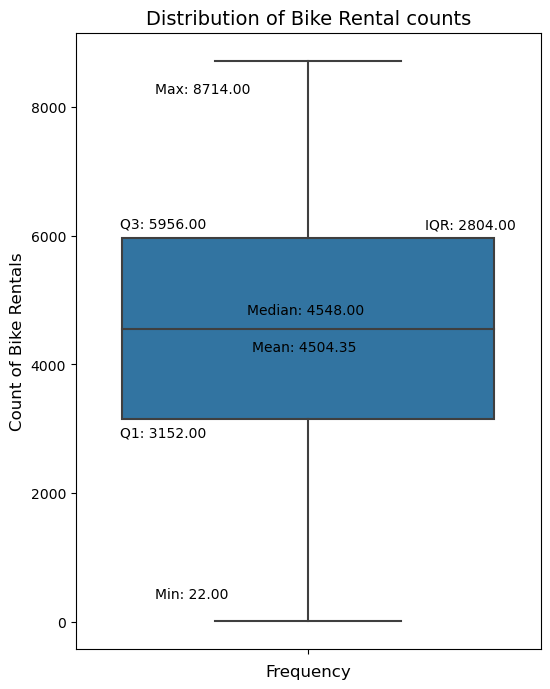

In [9]:
# Set figure size with matplotlib
fig, ax15 = plt.subplots(figsize=(6, 8))

# Plot vertical box plot to show the distribution of bike rentals
ax15 = sns.boxplot(y=df['cnt'], ax=ax15)  # Switched x to y
ax15.set_title("Box Plot 1")

# Calculate mean and interquartile range
mean_value = df['cnt'].mean()
q1 = df['cnt'].quantile(0.25)
q3 = df['cnt'].quantile(0.75)
iqr = q3 - q1

# Calculate maximum and minimum values
max_value = df['cnt'].max()
min_value = df['cnt'].min()

# alignment of the label in the graph
ax15.text(0.17, 0.92, f'Max: {max_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')
ax15.text(0.17, 0.10, f'Min: {min_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')
ax15.text(0.38, 0.50, f'Mean: {mean_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')
ax15.text(0.75, 0.70, f'IQR: {iqr:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')

# alignment of data labels for median and whisker ends
ax15.text(0.62, 0.55, f'Median: {df["cnt"].median():.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#first quatile
ax15.text(0.28, 0.35, f'Q1: {q1:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#third quatile
ax15.text(0.28, 0.69, f'Q3: {q3:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')

# Set axis labels
ax15.set_xlabel("Frequency", fontsize=12)
ax15.set_ylabel("Count of Bike Rentals", fontsize=12) 

# Set title
ax15.set_title("Distribution of Bike Rental counts", fontsize=14)

# Display the plot
plt.show()


A box plot is chosen for this graph as it gives a clear overview on how the number of bike rental ranges per day. Information such as the mean bike rental, upper quartile count and lower quartile count, the maximum and minimum bike rental counts can be shown through this plot. 

In this graph, the total bike rentals fluctuate within a range of 3152 to 5956 per day. Additionally, there are instances where the bike rental count peaks at 8714 rides per day, as well as times when the daily bike rental is as low as 22. 

This graph answers the exploratory question 1a), how is the overall bike rental distributed over 2011 and 2012. 

##### How is the bike rental distributed by season? 

In [10]:
# Create dictionary to define replacement values
replacement_seasons = {'season':{1:'Spring',2:'Summer',3:'Fall',4:'Winter'}}

# Replace values in DataFrame using dictionary map
df.replace(replacement_seasons, inplace=True)

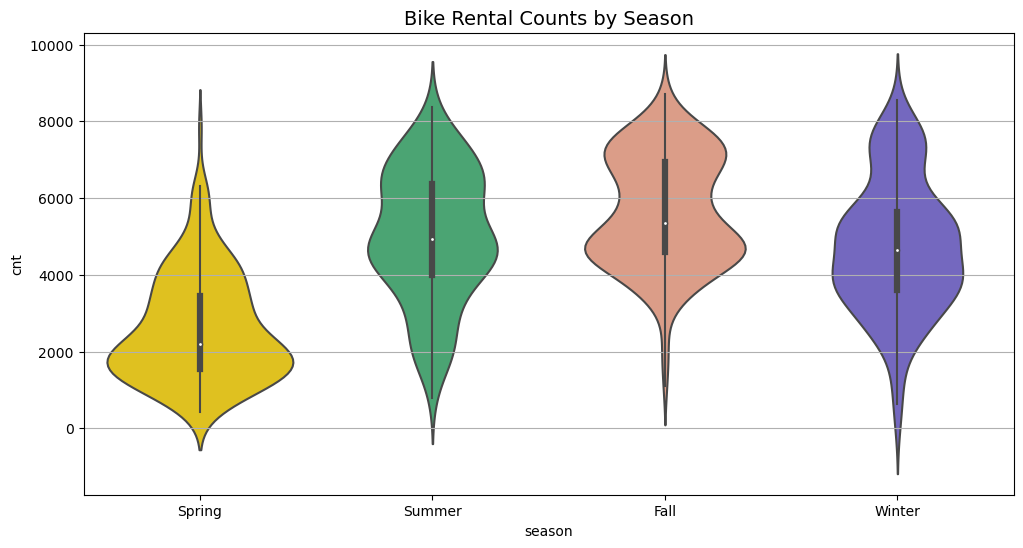

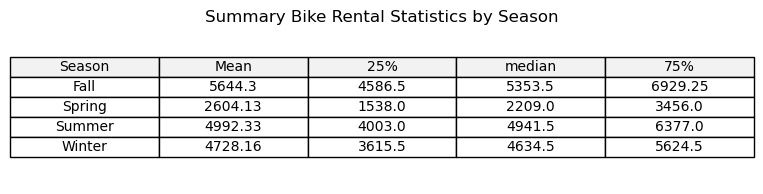

In [11]:
# Set figure size with matplotlib
fig, ax16 = plt.subplots(figsize=(12, 6))

# Add grid lines 
ax16.grid(True)

# Define a custom color palette by seasons
custom_palette = {'Spring': 'gold', 'Summer':'mediumseagreen', 'Fall': 'darksalmon', 'Winter': 'slateblue'}

# Create violin plot to show the distribution of bike rentals for each season
ax16 = sns.violinplot(x='season', y='cnt', data=df, ax=ax16, palette=custom_palette,)

# Set title
ax16.set_title("Bike Rental Counts by Season", fontsize=14)

# Display the plot
plt.show()

#------------- Creating summary table on the statistics

# Calculate mean and interquartile range for each season
season_stats = df.groupby('season')['cnt'].describe()[['mean', '25%', '50%', '75%']]

# Create a figure and axis
fig, ax17 = plt.subplots(figsize=(8, 2))  

# Hide the axes
ax17.axis('off')

# Round the 'Mean' column to 2 decimal points
season_stats['mean'] = season_stats['mean'].round(2)

# Convert season_stats DataFrame to a table
table_data = season_stats.reset_index().values
table_headers = ['Season', 'Mean', '25%', 'median', '75%']
table = ax17.table(cellText=table_data, colLabels=table_headers, loc='center', cellLoc='center', colColours=['#f2f2f2']*5)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the scaling factor as needed

# Set a title for the table
ax17.set_title('Summary Bike Rental Statistics by Season', fontsize=12)

# Display the table
plt.show()


(1:spring, 2:summer, 3:fall, 4:winter)


A violin plot is chosen to show the overall bike rental counts by seasons. The width of the violin shows the spread of the bike rental count across seasons, giving a visual representation on the bike rental counts that has a higher frequency during the season. The box plot within the violin chart is able to show the median and the consistency of the spread of bike rentals. The colours represent different season.  To make the graph look more organised, instead of displaying the details through data labels, it is displayed using a table. 


From this plot, Spring exhibits the lowest bike rental counts, mostly ranging between 3500 and 1500 rentals a day in terms of interquatile range.  Both Summer and Fall show higher bike rental counts, with numbers ranging between 7000 and 4000.  This suggests a higher demand for bikes during these seasons.Winter has slightly lower bike rental counts compared to Summer and Fall, indicating a decrease in demand during the colder months. 

By observing the spread of the violin chart, we can see that there are more days with bike rental count ranging around 2000 rentals during the spring season whereas there are more bike rental counts that is around 5000 and 7000 during the fall season. 

As such, there is a noticeable seasonal pattern in bike rentals, with higher demand during warmer periods and lower demand during colder seasons. This graph answers the exploratory question 1b, by showing the overall spead of bike rental counts by different seasons. 

##### What is the proportion of Casual users to Registered users? 

In [12]:
casual_users = df['casual'].sum()  #retrieve the total number of casual_users 
registered_users = df['registered'].sum()   #retrieve the total number of casual_users

users=[casual_users, registered_users]  #make the no. of users and casual users into a list
label1 = ["Casual","Registered"]  #list that contains the label for the pie segments 

#checking
users

[620017, 2672662]

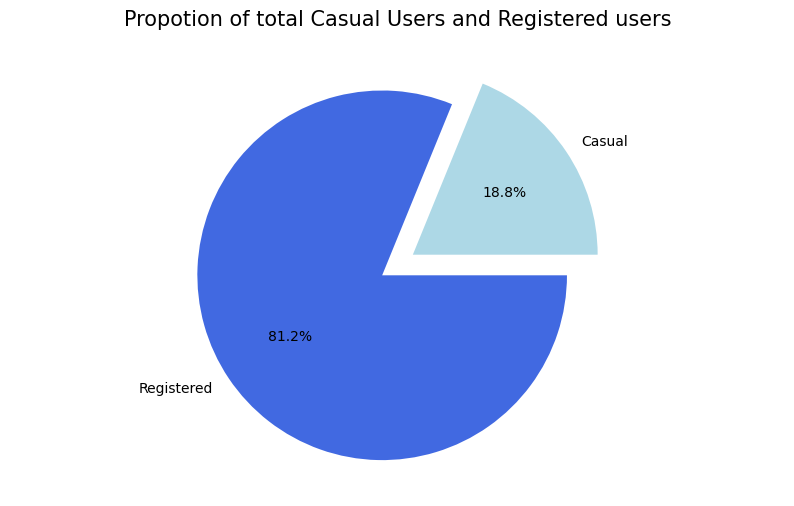

In [13]:
# Enter your code here:
fig, ax = plt.subplots(figsize=(10, 6))

#set equal aspect ratio to ensure that pie is drawn as a circle
ax.axis('equal')

# set colours for registered and casual users 
custom_colors = ['lightblue', 'royalblue']

#set title
ax.set_title("Propotion of total Casual Users and Registered users",fontsize = 15)

#create plot
ax.pie(users, explode=(0.1, 0.1), labels=label1, autopct='%1.1f%%', colors=custom_colors)

#display plot
plt.show()

A pie chart is chosen as it gives a clear representation of the proportion of casual and registered users. Different shades of blue is used to differenciate the groups and to create a consistency with other charts. 

As observed in this pie chart, registered users constitute the majority of bike rentals, representing over 80% of the total bike rentals, while the remaining portion consists of casual users. 

This suggests a potential opportunity for the bike-sharing business to engage more with casual users.

This graphs answers the exploratory question 1c, showing the proportion of casual usrs to registered users.

##### How did the number of casual users and  registered users change in 2011 and 2012? 

In [14]:
# Extra data for casual and registered  and casual users for comparison
registered= df.groupby('yr')['registered'].mean().round()
casual= df.groupby('yr')['casual'].mean().round()

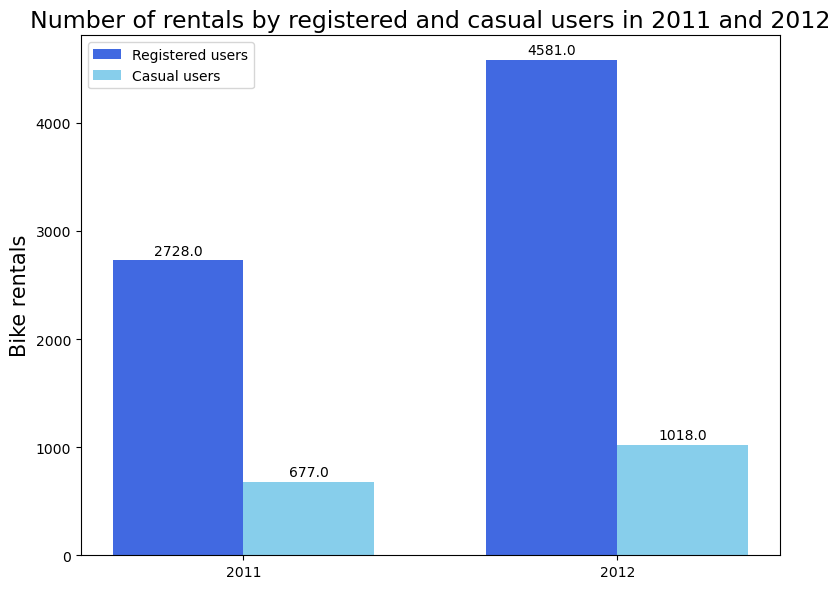

In [15]:
#This graph is not presented during the presentation
# Set the label locations and width of the bars
x_labels = ['2011', '2012']
x = np.arange(len(x_labels))
width = 0.35

# Create a figure and subplot
fig, ax17 = plt.subplots(figsize=(8, 6))

# Plot side-by-side bars
bar1 = ax17.bar(x - width/2, registered, width, label='Registered users',color = 'royalblue')
bar2 = ax17.bar(x + width/2, casual, width, label='Casual users',color='skyblue')

# Customise the plot
ax17.set_title('Number of rentals by registered and casual users in 2011 and 2012', fontsize=17)
ax17.set_ylabel('Bike rentals', fontsize=15)
ax17.set_xticks(x)
ax17.set_xticklabels(x_labels)

ax17.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax17.annotate('{}'.format(height),
                      xy=(each.get_x() + each.get_width() / 2, height),
                      xytext=(0, 2),  # 2 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()


A grouped barchart is used to show the changes in the number of casual and registered users across the two years, and the same colour scheme to differentiate the regular and casual users is adopted to reduce confusion and maintain a consistency. 

From this graph, the mean number of rentals by casual users and registered users has both increased in 2012 compared to 2011. Specifically, registered users experienced a substantial surge, with rental counts soaring from 2728 in 2011 to 4581 in 2012. Similarly, casual users also witnessed an increase, rising from 677 rentals in 2011 to 1018 rentals in 2012. This indicates a significant growth in user engagement and usage patterns for both user categories, especially registered users, during the transition from 2011 to 2012.


This graph answers the exploratory question 1d, comparing the bike rental demographics in 2011 and 2012. 

###  3.2 Pertaining to the weather conditions and seasons <a id="vizcat2"></a>

##### a) Whats the relationship between temperature and bike rentals?

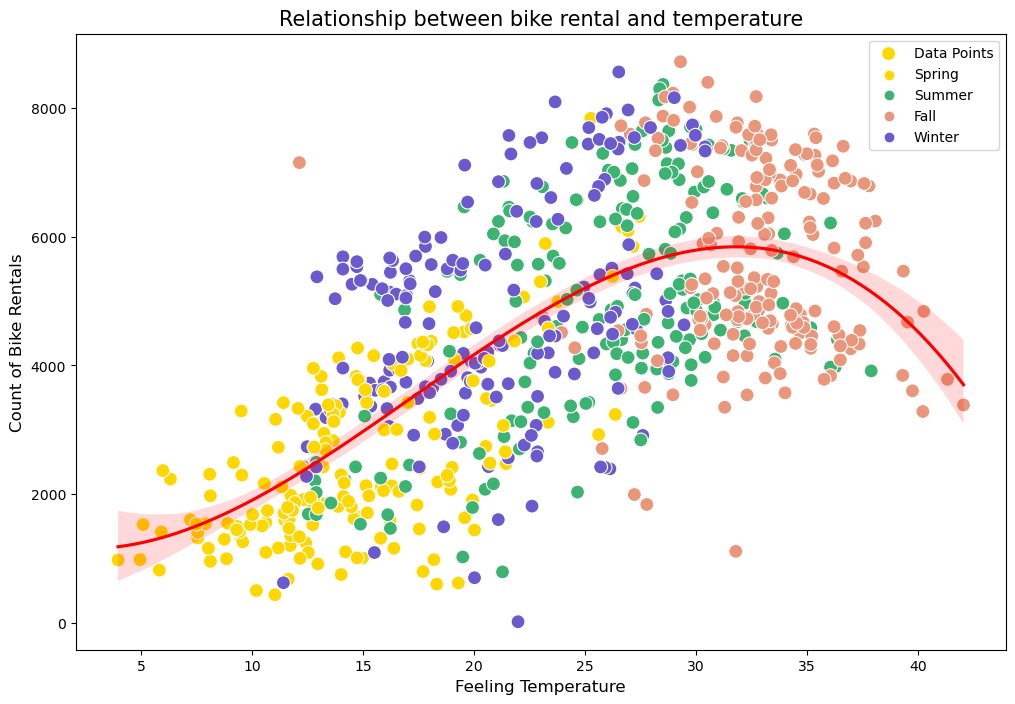

In [16]:
# set figure size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a scatter plot of temperature vs. bike rentals with customized color
sns.scatterplot(ax=ax1, data=df, x='atemp', y='cnt',hue='season',  palette=custom_palette, s=100, label='Data Points')

# Overlay a best-fit line with a different color
sns.regplot(ax=ax1, x='atemp', y='cnt', data=df, order=3, scatter=False, line_kws={'color': 'red', 'label': 'Cubic Fit'})

# Set the title and axis labels
ax1.set_title('Relationship between bike rental and temperature', fontsize=15)
ax1.set_xlabel('Feeling Temperature', fontsize=12)
ax1.set_ylabel('Count of Bike Rentals', fontsize=12)

# Customize the legend
ax1.legend()

# Display the plot
plt.show()


This scatter graph shows the relationship between feeling temperature and bike rental count, differenciated by seasons.The regression line illustrates how the feeling temperature relates to bike rental count. 

This graph would be able to answer the exploratory question 2a.

As seen from the regression line, as temperature increases, bike rental increases to a certain point, after which the rentals begin to decrease. 

The feeling temperature where bike rental is at its highest is around 30 to 35 degree celcius, which is mostly the fall season. This shows that temperature between 30 to 35 degress is the optimal temperature where bike rentals are maximized.

For feeling temperatures that are beyond 35 degrees, a decrease in bike rentals is observed. 


##### b) Do different weather conditions have a notable effect on the total number and type of people renting bikes? <a id="weathercondition"></a>

Changing the number indicators for weather situation to words 

In [17]:
# Create dictionary to define replacement values for clearer chart labels
replacement_weathersit = {'weathersit':{1:'Clear Sky',2:'Misty',3:'Precipitation',4:'Severe Condition'}}

In [18]:
# Replace values in DataFrame using dictionary map
df.replace(replacement_weathersit, inplace=True)
df['weathersit'].head()

0        Misty
1        Misty
2    Clear Sky
3    Clear Sky
4    Clear Sky
Name: weathersit, dtype: object

In [19]:
# group the values by its mean
y_registered= df.groupby('weathersit')['registered'].mean().round()
y_casual= df.groupby('weathersit')['casual'].mean().round()

# Filter out 0 values
y_registered = y_registered[y_registered != 0]
y_casual = y_casual[y_casual != 0]

#sort the values in descending order to show a distinct comparison between the different weather conditions, 
#such as how high and how low is the bike rental in  differernt weather conditions. 
y_registered.sort_values(ascending = False, inplace = True)
y_casual.sort_values(ascending = False, inplace = True)

#assign the x values
x_weather_sit = y_casual.index

#checking
y_casual

weathersit
Clear Sky        964.0
Misty            687.0
Precipitation    185.0
Name: casual, dtype: float64

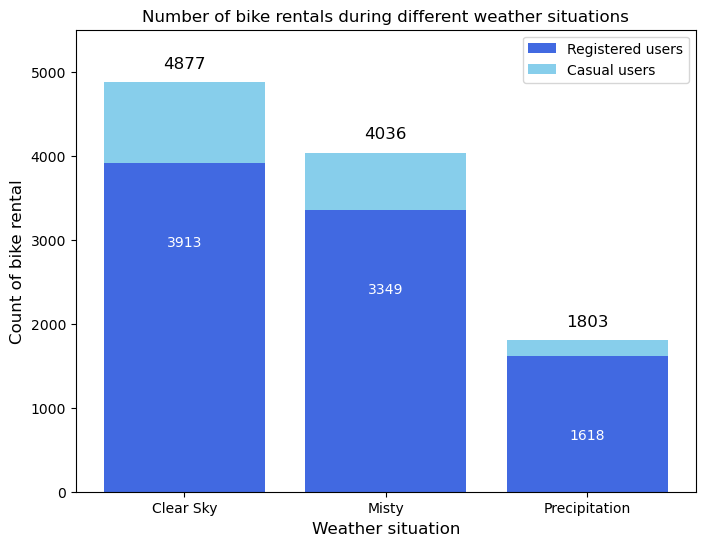

In [20]:
# Create a vertical bar chart using data 
fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.bar(x_weather_sit, y_registered, label='Registered users', color='royalblue')
ax2.bar(x_weather_sit, y_casual, bottom=y_registered, label='Casual users', color='skyblue')

# Set title, labels, and limits
ax2.set_title('Number of bike rentals during different weather situations')
ax2.set_ylabel('Count of bike rental', fontsize=12)
ax2.set_xlabel('Weather situation', fontsize=12)
ax2.set_ylim([0, 5500])


# Display data labels
for x, y in zip(x_weather_sit, y_registered + y_casual):
    label = "{:d}".format(int(y))
    ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
    
#display data labels for registered users 
for x, y in zip(x_weather_sit, y_registered):
    label = "{:d}".format(int(y))
    ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, -60), ha='center', color = 'white')

# Tick size
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Display legend
ax2.legend()

# Display the plot
plt.show()


A stacked bar graph is used to show the overall bike rental counts across different weather situation and the proportion of registered and casual users to the whole. It would be able to answer the exploratory question 2b.

From this graph, it is clear that the number of registered users is significantly greater than casual users when comparing the proportions.

Days with clear skies attract a greater number of both casual and registered users compared to misty and precipitation days. The overall bike rental is highest on days with clear skies and least on days with precipitation. There are no extreme weather conditions during the timeframe of the data given.


#####  How has the demand in bike rental changed across different seasons?  

In [21]:

y_registered1= df.groupby('season')['registered'].mean().round()#bike rental counts for registered users 
y_casual1= df.groupby('season')['casual'].mean().round()# bike rental counts for casual users
y_bike_rental = df.groupby('season')['cnt'].mean().round() #overall bike rental counts

# sort the values from  in descending order such that seasons with the highest bike rental will be displayed first. 
y_bike_rental.sort_values(ascending = False, inplace = True)
y_registered1.sort_values(ascending = False, inplace = True)
y_casual1.sort_values(ascending = False, inplace = True)

#assign the x values
x_seasons = y_casual1.index

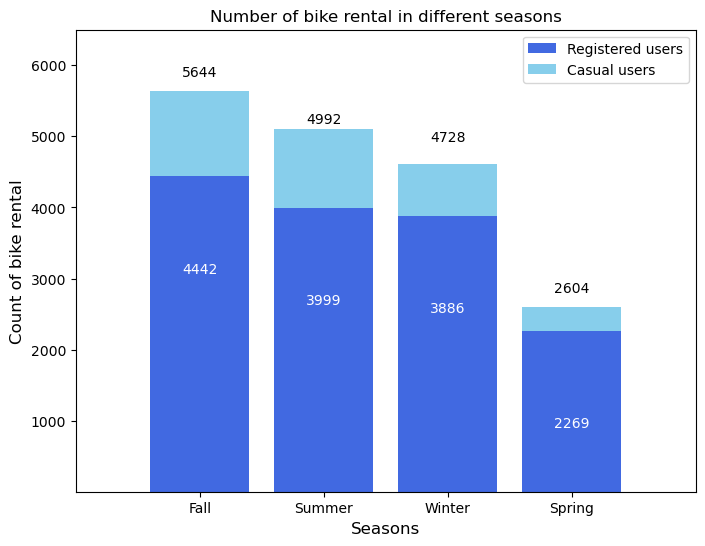

In [22]:
fig, ax3 = plt.subplots(figsize=(8, 6))

# Create a vertical bar chart using data
ax3.bar(x_seasons, y_registered1, label='Registered users', color = 'royalblue')
ax3.bar(x_seasons, y_casual1, bottom=y_registered1, label='Casual users', color = 'skyblue')

# Set title of the plot and the axes labels
ax3.set_title('Number of bike rental in different seasons')
ax3.set_ylabel('Count of bike rental', fontsize=12)
ax3.set_xlabel('Seasons', fontsize=12)

# Set ranges for the x-axis and y-axis
ax3.set_xlim([-1, len(x_seasons)])
ax3.set_ylim([2, 6500])

# Display data labels for casual users
for x, y in zip(x_seasons, y_bike_rental):
    label = "{:d}".format(int(y))
    ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
#display data lavels for registered users 
for x, y in zip(x_seasons, y_registered1):
    label = "{:d}".format(int(y))
    ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, -70), ha='center', color = 'white')
    
#display legend
ax3.legend()

# Tick size
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)

# Display the plot
plt.show()


A stacked bar graph is used to show the distribution of bike rental count across different seasons and compare the proportion of registered and casual users to the whole. 

Fall stand out with higher bike rental counts compared to the other seasons followed by Summer, Winter and Spring being the lowest. 

For the demographics, the number of casual users are more during summer and fall seasons. We can also observe that the number of registered users for winter is similar to the number of registered users in Summer, but the number of casual users is lesser in comparison.

As such, this implies that casual users are less active during the winter and spring season, and summer and fall is the peak period for casual bike rentals. Thus, there is a strong seasonal influence on bike rental patterns, and the dominace of registered users across these seasons also indicates a consistent user base. 

This graph would be able to answer the exploratory question 2c.

##### How does the weather condition differ across months with different seasons?

In [23]:
# Changing the weather situation indicator back to integer (for calculating the average)
# Create dictionary to define replacement values
replacement_weathersit = {'weathersit':{'Clear Sky':1,'Misty':2,'Precipitation':3,'Severe Condition':4}}

# Replace values in DataFrame using dictionary map
df.replace(replacement_weathersit, inplace=True)


In [24]:
# group the values by its mean
y_AvgWeatherCondition = df.groupby('season')['weathersit'].mean()

#assign the x values
x_season = y_AvgWeatherCondition.index

y_AvgWeatherCondition

season
Fall      1.297872
Spring    1.408840
Summer    1.402174
Winter    1.477528
Name: weathersit, dtype: float64

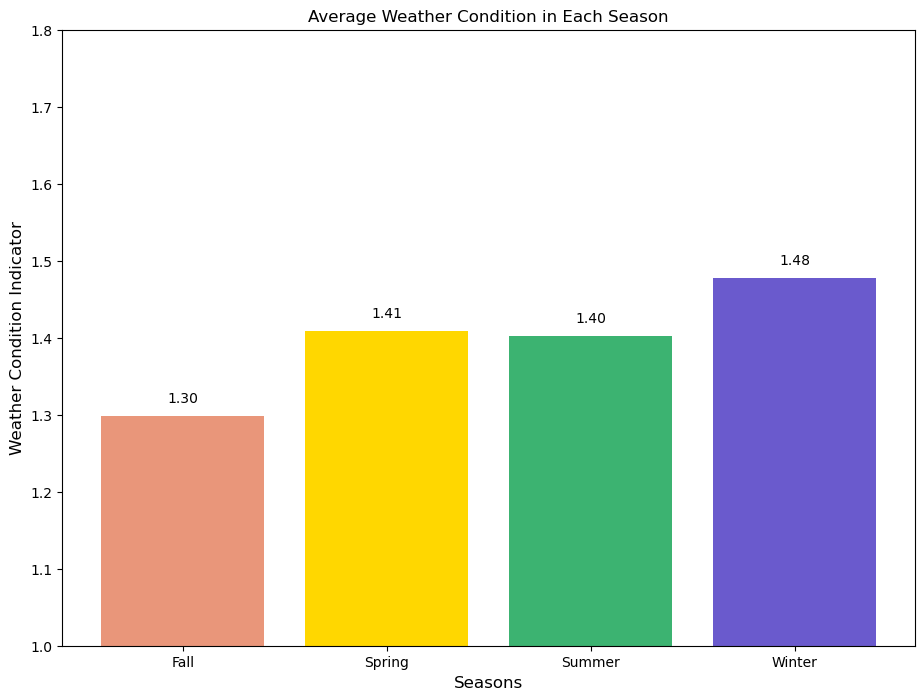

In [25]:
fig, ax4 = plt.subplots(figsize=(11, 8))

# Set title of the plot and the axes labels
ax4.set_title('Average Weather Condition in Each Season')
ax4.set_ylabel('Weather Condition Indicator', fontsize=12)
ax4.set_xlabel('Seasons', fontsize=12)
ax4.set_ylim(bottom = 1, top = 1.8)


# customise the colours to represent different seasons
colors = ['darksalmon', 'gold', 'mediumseagreen', 'slateblue']

# Plot the bar graph with custom colors
ax4.bar(x_season, y_AvgWeatherCondition, color=colors)

# Display data labels on the bars
for x, y in zip(x_season, y_AvgWeatherCondition):
    label = "{:.2f}".format(y)
    ax4.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


# Tick size
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)

# Display the plot
plt.show()

This bar graph compares the average weather condition across different seasons, and each colour corresponding to each season. It answers the exploratory question 2e. The closer the average weather condition is to 1, the more the number of occurrances of clear skies. 

Overall, as seen from the graph, the average weather condition indicators is at around 1.4, suggesting that the weather condition is mostly clear skies or misty condition, with some occasions of precipitations over the seasons in 2011 and 2012.

Specifically, the weather condition indicator for fall season is the least among other seasons. This shows that there are more occurrance of clear skies during the fall season. The average weather condition indicator for the winter season is the highest compared other seasons, suggesting more mistly and precipitation weathers compared to other seasons. 

As such, the fall period offers a prime opportunity for outdoor enthusiasts and event planners to capitalize on the extended periods of clear weather, whereas outdoor activities might be lesser during the winter season. 


##### Does the Wind speed and humidity affect the bike rental counts? 

In [26]:
#This graph is not presented during the presentation

#data for the graph
temp_data = df.groupby('mnth')['atemp'].mean().round()
humidity = df.groupby('mnth')['Humidity'].mean().round()
wind_speed = df.groupby('mnth')['windspeed'].mean().round()
count = df.groupby('mnth')['cnt'].mean().round()
months =wind_speed.index

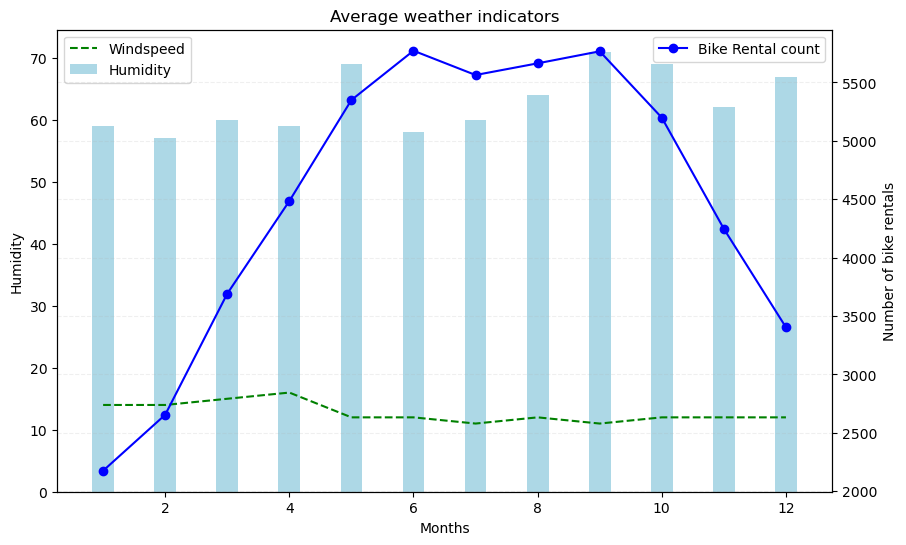

In [27]:
# Create the first y-axis for the average weather indicator
fig, ax5 = plt.subplots(1, 1, figsize=(10, 6))

# Label the first y-axis
ax5.set_ylabel('Humidity')
ax5.set_xlabel('Months')

# Plotting graphs on the first y-axis
ax5.bar(months, humidity, width=0.35, color='lightblue', label='Humidity')
ax5.plot(months, wind_speed, 'g', label='Windspeed', linestyle='--')
ax5.tick_params(axis='y')

# Create the second y-axis for windspeed and temperature (as bar graph)
ax6 = ax5.twinx()

ax6.set_ylabel('Number of bike rentals')
ax6.plot(months, count, 'b-o', label='Bike Rental count')

ax6.tick_params(axis='y')

# Display legend on the first y-axis (ax1)
ax6.legend(loc='upper right')

# display legend on the second y-axis (ax2)
ax5.legend(loc='upper left')


# Set grid lines to red, 0.2 transparency, and dashed linestyle
plt.grid(alpha=0.2, linestyle='--')

# Title and display the chart
plt.title('Average weather indicators')
plt.show()

A dual axis chart is chosen to compare three variables, bike rentals, humidity and winspeed. It is used to determine if there is any relationship across these variables. 


The graph depicts the average changes in bike rental, wind speed,and humidity in each of the 12 months in 2011 and 2012, aiming to compare the relationship of bike rentals between wind speed and humidity.  This graph would be able to answer the exploratory question 2d.

The lowest bike rental count occurs in January, followed by a steady rise in rentals in the subsequent months, peaking around June. Notably, from June to September, rental counts remain consistently high, indicating a surge in bike usage during the warmer months. A substantial decline is observed from September to December. 

Over the 12 months, humidity levels exhibit a consistent pattern with minimal fluctuations throughout the year. However, there is a sudden spike in humidity during May, coinciding with the mid-summer season. Additionally, a rise in humidity is also observed from August to September, marking the shift from summer to fall. Whereas the average wind speed remains relatively stable, with only a slight decrease in windspeed from April to May.  

As such, the change in the bike rental pattern has no clear relationship with humidity and windspeed. The rise and decline of the bike rental patterns are more likely due to external factors, such as seasonal influence and weather conditions. 


##### What is the impact of weather condition and bike rental numbers? <a id="linexSC"></a> 

In [28]:
#make a copy of the data set first
df2 = df.copy()

#converting the date to datetime type
df2['dteday'] = pd.to_datetime(df2['dteday'], format="%d/%m/%Y")

# Retrieve the datetime data for October 2011
october_2011_data = df2[(df2['dteday'].dt.month == 10) & (df2['dteday'].dt.year == 2011)]

# Bike rental in October 2011
october_2011_rental = october_2011_data['cnt']

# october_2011_data.head(10)


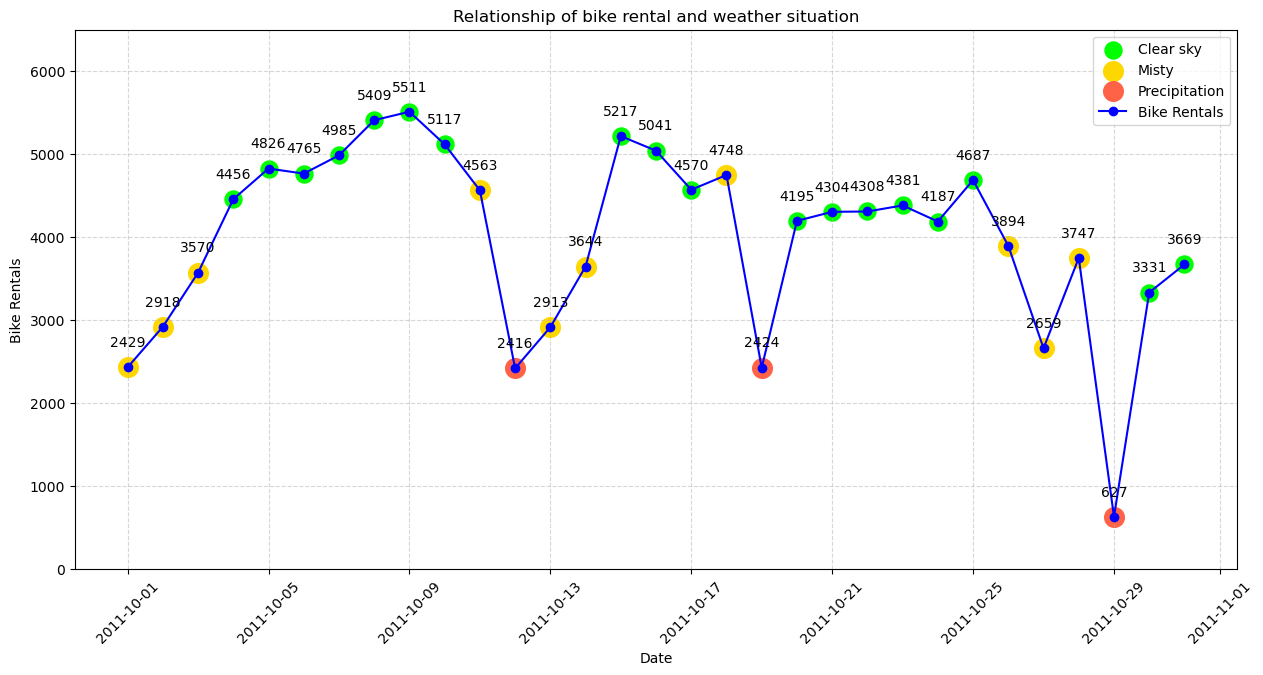

In [29]:
# Set figure size
fig, ax9 = plt.subplots(figsize=(15, 7))

# Customize the plot
ax9.set_xlabel('Date')
ax9.set_ylabel('Bike Rentals')
ax9.set_title('Relationship of bike rental and weather situation')
ax9.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
ax9.set_ylim(0, 6500)

# Marking weather conditions with scatter plot
#plot clear sky points
ax9.scatter(october_2011_data[october_2011_data['weathersit'] == 1]['dteday'],
            october_2011_data[october_2011_data['weathersit'] == 1]['cnt'],
            color='lime', label='Clear sky', marker='o', s=150) 

#plot misty sky points
ax9.scatter(october_2011_data[october_2011_data['weathersit'] == 2]['dteday'],
            october_2011_data[october_2011_data['weathersit'] == 2]['cnt'],
            color='gold', label='Misty', marker='o', s=200)

#plot precipitation points
ax9.scatter(october_2011_data[october_2011_data['weathersit'] == 3]['dteday'],
            october_2011_data[october_2011_data['weathersit'] == 3]['cnt'],
            color='tomato', label='Precipitation', marker='o', s=200)

# Plot data 
ax9.plot(october_2011_data['dteday'], october_2011_data['cnt'], 'b-o', label='Bike Rentals')

# Add data labels
for x, y in zip(october_2011_data['dteday'], october_2011_data['cnt']):
    label = "{:d}".format(int(y))
    ax9.annotate(label, (x, y), textcoords="offset points", xytext=(0, 15), ha='center')

# Show legend
ax9.legend()

#show grid 
ax9.grid(alpha = .5,linestyle = '--')

# Show the plot
plt.show()

To answer the exporatory question 2f, we will be examing the data of October 2011.

A line chart is used to show the change in the bike rental counts in october 2011, and highlights representing different weather situations is made through scatter plots. This graph will be able to show case the weather conditions everyday in october 2011.

From this graph, it reveals that the distinct pattern of fluctuation in bike rentals throughout October 2011 is closely tied to the inconsistent weather patterns during that period.Specifically, when the sky is clear, the bike rental counts exhibit a range between 3331 and 5511. In contrast, during misty conditions, the bike rental count experiences a noticeable decline, dropping to around 2429 to 4748. Furthermore, when precipitation occurs, the bike rental count drops even further, ranging between 624 to 2424.

In summary, the observed fluctuations in bike rentals coincide with different weather situations, highlighting a correlation between the weather conditions and the demand for bike rentals

### 3.3 Pertaining to temporal analysis <a id="vizcat3"></a> 

##### How has the demand in bike rental changed across different months and how is it affected by the temperatures?


In [30]:
# Extract year and month from the 'dteday' column and form a new column called 'year_month'
df['year_month'] = df['dteday'].dt.to_period('M')

#group the data by the 'year_month'
temperature_per_month = df.groupby('year_month')['atemp'].mean().round()
bike_rental = df.groupby('year_month')['cnt'].mean().round()
year_month_str = temperature_per_month.index.astype(str)

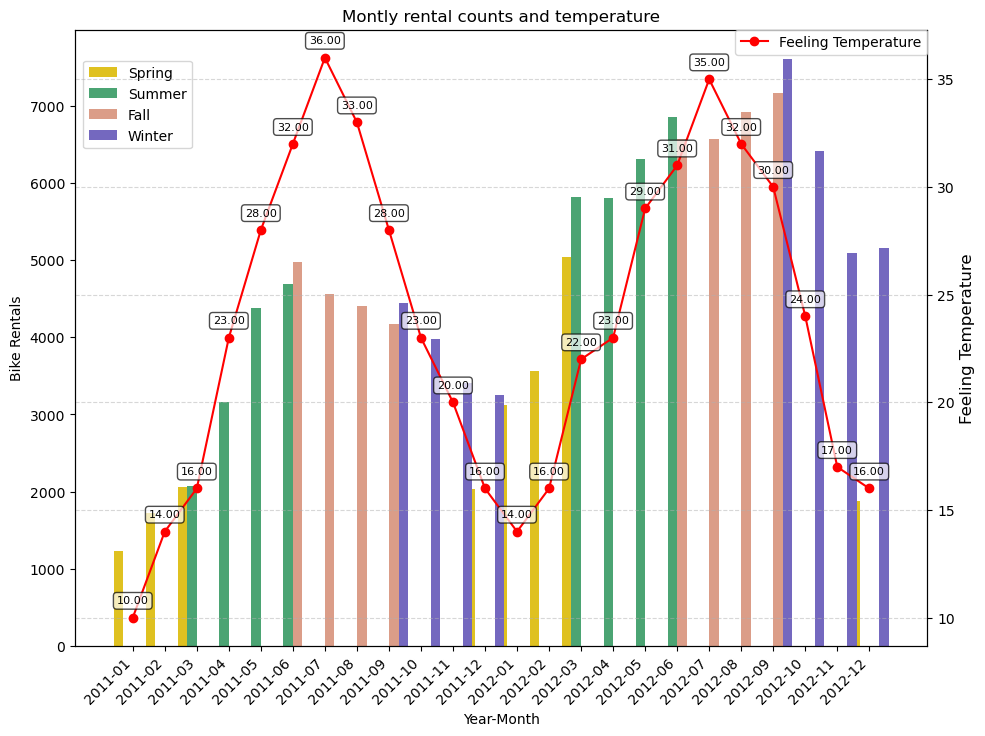

In [31]:
# Set figure size
fig, ax13 = plt.subplots(figsize=(11, 8))

# Plot a bar graph using seaborn with color-coded seasons and custom color palette
sns.barplot(x='year_month', y='cnt', hue='season', data=df, ax=ax13, errorbar=None, palette=custom_palette, width=1.2)

# Set title and labels
ax13.set_title('Montly rental counts and temperature')
ax13.set_xlabel('Year-Month')
ax13.set_ylabel('Bike Rentals')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Position the legend
ax13.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95), borderaxespad=0.0)

# Create the second y-axis for temperature (as line plot)
ax14 = ax13.twinx()

# Plot temperature data on the second y-axis using Seaborn
ax14.plot(year_month_str, temperature_per_month, marker='o', linestyle='-', color='red', label='Feeling Temperature')

# Set title of the plot and the axes labels
ax14.set_ylabel('Feeling Temperature', fontsize=12)

# Display data labels on the line plot
for x, y in zip(year_month_str, temperature_per_month):
    label = "{:.2f}".format(y)
    # Set translucent border for the labels
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
    ax14.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', bbox=bbox_props,fontsize=8)
    
ax14.legend(bbox_to_anchor=(1.0, 1.0), borderaxespad=0.0)

plt.grid(alpha=0.5, linestyle='--')

# Display the dual-axis chart
plt.show()


A dual axis chart is used to show the change in temperature and bike rentals. The aim is to find out if there is any relationship between bike rentals and temperature. The different colours in the bars indicates different seasons over the years. 

From this graph,there is also a noticable correlation between the temperature and bike rental counts, also as highlighted in the aforementioned scatter plot. This graph would be able to answer the exploratory question 3a.

In 2011, bike rentals is at its lowest point in January, corresponding to the spring season, with the mean temperature being the lowest compared to other months. Subsequently, there is a steady increase in temperature and bike rental counts until June. As the season transitions from summer to fall, both temperature and bike rental counts reached a peak and start to decrease.

Moving on to January 2012, the temperature is higher than in 2011. This difference in temperature during the spring season may account for the disparity in bike counts between spring in 2011 and 2012. Additionally, the overall distribution of bike rental counts is higher in 2012 compared to 2011, despite similar trend in temperature change.  For 2012, the bike rental count only starts to decrease when the year enters the winter season,whereas bike rental in 2011 has began declining during the start of the fall season. 

Thus. it becomes apparent that the variation in temperature alone might not be the sole factor influencing bike rental trends. The extended period of increase in bike rentals could also be attributed to weather conditions and a rise in popularity in 2012. 

##### Does holidays affect the number of bike rental counts? 

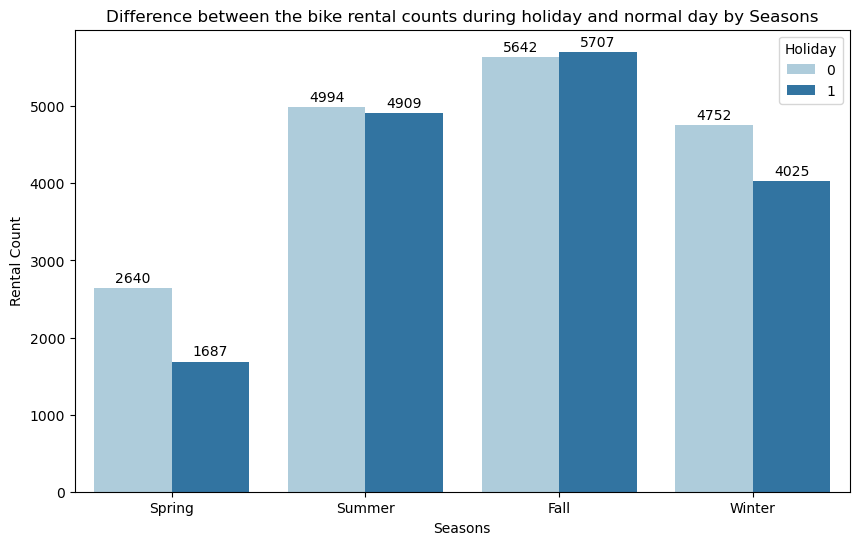

In [32]:
# This graph is not presented during the presentation

# Set up the figure and axes
fig, ax10 = plt.subplots(figsize=(10, 6))

# Use a custom color palette
sns.set_palette("Paired")

# Create a grouped bar chart using Seaborn
sns.barplot(x='season', y='cnt', hue='holiday', data=df, errorbar=None, ax=ax10)

# Set plot labels and title
ax10.set_xlabel('Seasons')
ax10.set_ylabel('Rental Count')
ax10.set_title('Difference between the bike rental counts during holiday and normal day by Seasons')

# Display the legend
ax10.legend(title='Holiday', loc='upper right')

# Define your bars
bars = ax10.patches

# Add annotations 
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax10.annotate('{}'.format(int(height)),  # Convert height to integer
                      xy=(each.get_x() + each.get_width() / 2, height),
                      xytext=(0, 2),  # 2 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

# Use function to display data labels for bars
autolabel(bars)

# Show the plot
plt.show()


A grouped barchart is used to show the difference in the number of users on holidays and non-holidays across different seasons. 

This graph examines the correlation between bike rental counts on holidays and non-holidays. In the graph, '0' (lighter bar) signifies non-holiday days, while '1' (darker bar) signifies holidays. It will be able to answer the exploratory question 3b.

Generally non-holidays has a higher mean bike rental counts compared to holidays. During spring and winter, non-holidays show a significantly lower bike rental counts than holidays.Spring had the most significant difference, with non-holidays having approximately 1000 higher bike rentals compared to holidays.

However, during Summer and Fall, the bike rental counts for both holidays and non holiday appear to be similarly high, irrespective of whether it is a holiday or a regular weekday.

Thus, bike rental during cooler seasons will be lower during the holidays compared to non-holidays.

##### How does the working days affect the bike rental counts in a day? 

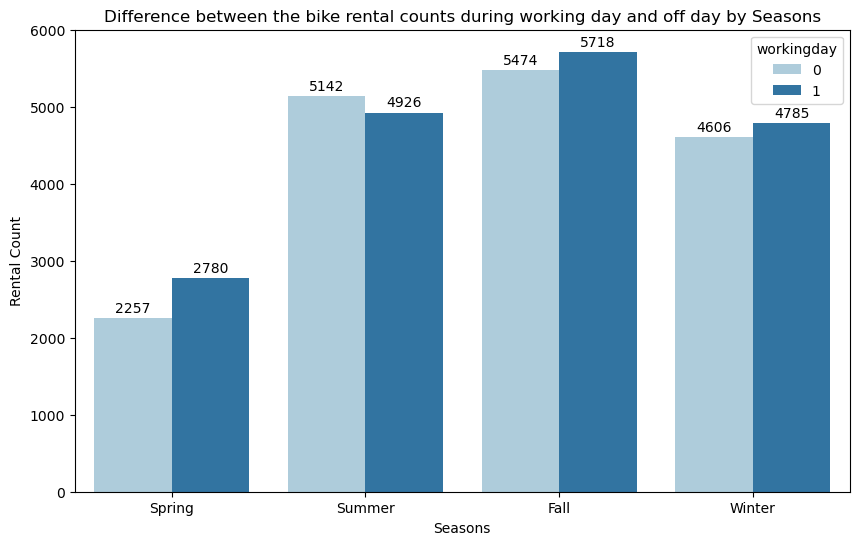

In [33]:
# Set up the figure and axes
fig, ax11 = plt.subplots(figsize=(10, 6))

# Use a custom color palette
sns.set_palette("Paired")

# Create a grouped bar chart using Seaborn
sns.barplot(x='season', y='cnt', hue='workingday', data=df, errorbar=None, ax=ax11)

# Set plot labels and title
ax11.set_xlabel('Seasons')
ax11.set_ylabel('Rental Count')
ax11.set_title('Difference between the bike rental counts during working day and off day by Seasons')

# Display the legend
ax11.legend(title='workingday', loc='upper right')

# Define the bars
bars = ax11.patches

# Add annotations 
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax11.annotate('{}'.format(int(height)),  # Convert height to integer
                      xy=(each.get_x() + each.get_width() / 2, height),
                      xytext=(0, 2),  # 2 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

# Use function to display data labels for bars
autolabel(bars)

# Show the plot
plt.show()


A grouped barchart is used to show the difference in the number of users on off days and working days across different seasons.

This graph examines the correlation between bike rental counts on working days and off days. In the graph, '0' (lighter bar) signifies off days, while '1' (darker bar) indicates working days.

Generally working days has a higher mean bike rental counts compared to off days as observed on bars indicating Spring, Fall and Winter.The most significant contrast is observed in spring, where there are approximately 500 more bike rentals during working days compared to non-working days.

Summer is the only period where there are more bike rentals during off days than during working days.

Thus, it can be inferred that working days are expected to receive more bike rentals than off days. This graph would be able to answer the exploratory question 3b.

##### What is the proportion of users during the summer season on working days and off days? 

In [34]:
# Filter data for the summer season
summer_data = df[df['season'] == 'Summer']

# Group data by workingday, and calculate the mean of casual and registered rentals
grouped_data = summer_data.groupby(['workingday'])[['casual', 'registered']].mean().reset_index()

grouped_data

,workingday,casual,registered
0,0,1887.375000,3255.053571
1,1,764.289062,4162.375000


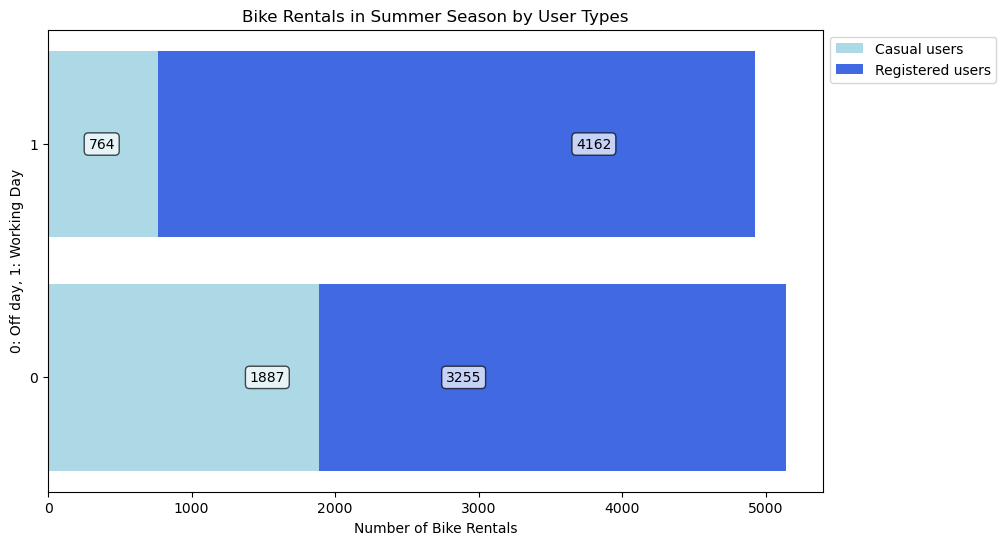

In [35]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal stacked bar plot using Matplotlib directly
bottom = None

# Create a horizontal stacked bar plot using Matplotlib directly
ax.barh(grouped_data['workingday'], grouped_data['casual'], color='lightblue', label='Casual users')
ax.barh(grouped_data['workingday'], grouped_data['registered'], left=grouped_data['casual'], color='royalblue', label='Registered users')


bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(-50, 0),bbox=bbox_props,
                textcoords='offset points')

# Add labels and title
ax.set_yticks([1, 0])  # Set the y-axis ticks to 0 and 1
ax.set_ylabel('0: Off day, 1: Working Day')
ax.set_xlabel('Number of Bike Rentals')
ax.set_title('Bike Rentals in Summer Season by User Types')
ax.legend(bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

This stackde graph shows the proportion of the users in the summer season, by working days and off days. It aims to compare the number of casual and registered users.

From the graph, there is significantly more casual users on off days than working days, while registered users' rental count is lower during off days.

This shows that most casual users will prefer to cycle during off days.  This graph is also able to answer the exploratory question 3b.

##### What is the rental pattens of casual and registered users in a week? 


In [36]:
# group the values into its mean per week
y_registered_week= df.groupby('weekday')['registered'].mean().round()
y_casual_week= df.groupby('weekday')['casual'].mean().round()
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

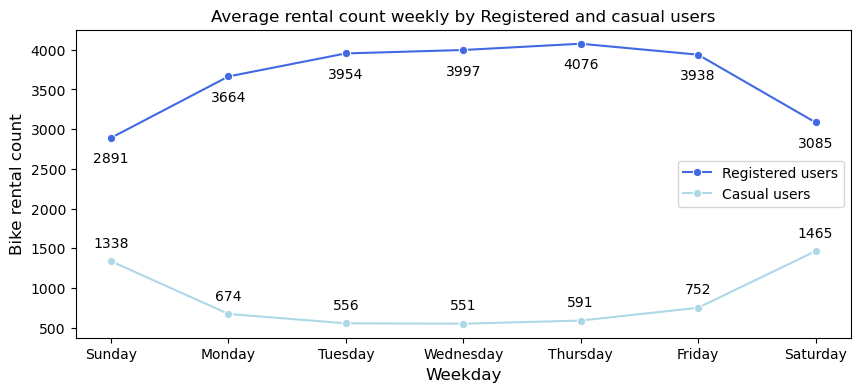

In [37]:
# Create a figure and axis using Matplotlib's subplots
fig, ax12 = plt.subplots(figsize=(10, 4))

# create a line plot for registered users 
sns.lineplot(x=weekdays, y=y_registered_week, ax=ax12, marker='o', label='Registered users',color = 'royalblue')

# create a line plot for casual users 
sns.lineplot(x=weekdays, y=y_casual_week, ax=ax12, marker='o', label='Casual users',color = 'lightblue')

# Set plot labels and title
ax12.set_xlabel('Weekday',fontsize = 12)
ax12.set_ylabel('Bike rental count',fontsize = 12)

# add data labels for registered users 
for x, y in zip(weekdays,y_registered_week):
    label = "{:d}".format(int(y))
    ax12.annotate(label, (x, y), textcoords="offset points", xytext=(0, -18), ha='center')
    
# add data labels for casual users 
for x, y in zip(weekdays,y_casual_week):
    label = "{:d}".format(int(y))
    ax12.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
#title
ax12.set_title('Average rental count weekly by Registered and casual users')


# Show the plot
plt.show()

This line graph illustrates the trend in the rental patterns of registered users and casual users throughout the week. Generally, the rental counts for registered users is much greater than casual users on a daily basis but their bike rental patterns exhibit a direct contrast.

For registered users, bike rentals decline during the weekends and surge during weekdays. However, casual users' rental count showed an increase in bike rental counts over the weekends, followed by a decrease during weekdays.

This graph would be able to answer the exploratory question 3c, showing the difference in bike renting patterns for registered and casual users.

----------------

# 4. Dashboards <a id="part4"></a>
[Back to top](#top)

Based on the exploratory questions, I have grouped the dashboard into 4 key categories where each dashboard can focus on. 

1. [Overall distribution of bike rental](#dashboard1) 
2. [Overall bike rental patterns of casual and registered users](#dashboard2) 
3. [Temporal analysis of bike rentals for casual and registered users](#dashboard3) 
4. [Relationship between bike counts, seasons and weather situation](#dashboard4) 

##### 4.1 Overall distribution of bike rental <a id="dashboard1"></a>

Text(0.5, 0.98, 'Overview of distribution of bike rental counts \n')

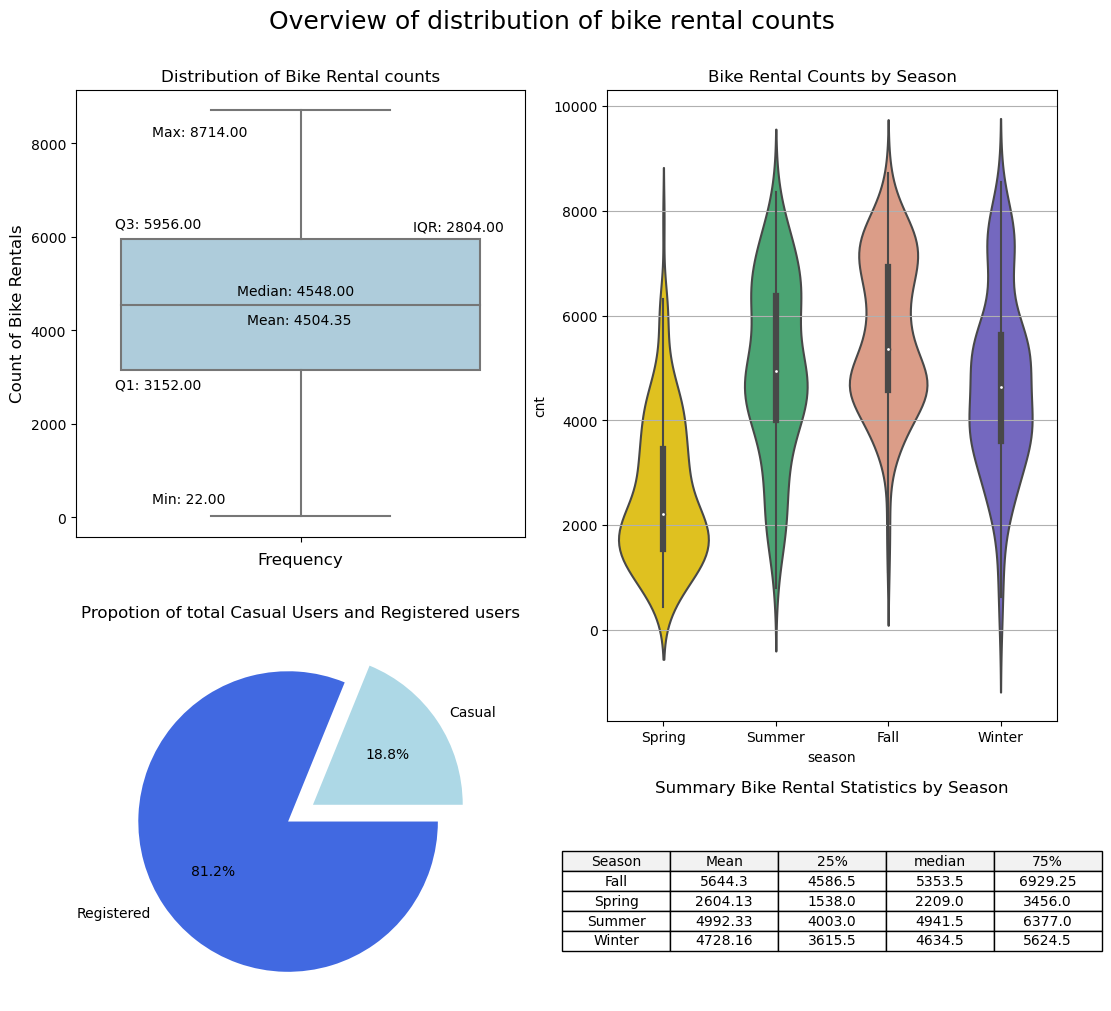

In [38]:
fig = plt.figure(figsize=(11, 10), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=11, ncols=10, figure=fig)

# Add subplots to the figure
ax15 = fig.add_subplot(gs[0:6,0:5])
ax = fig.add_subplot(gs[6:11,0:5])
ax16 = fig.add_subplot(gs[0:8,5:12])
ax17 = fig.add_subplot(gs[8:11,5:12])

                 # Define first subplot for box plot

# Plot vertical box plot to show the distribution of bike rentals
ax15 = sns.boxplot(y=df['cnt'], ax=ax15)  # Switched x to y
ax15.set_title("Box Plot 1")

# Calculate mean and interquartile range
mean_value = df['cnt'].mean()
q1 = df['cnt'].quantile(0.25)
q3 = df['cnt'].quantile(0.75)
iqr = q3 - q1

# Calculate maximum and minimum values
max_value = df['cnt'].max()
min_value = df['cnt'].min()
ax15.text(0.17, 0.92, f'Max: {max_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')
ax15.text(0.17, 0.10, f'Min: {min_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')

# Add labels for mean and interquartile range on the top of the graph
ax15.text(0.38, 0.50, f'Mean: {mean_value:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')
ax15.text(0.75, 0.71, f'IQR: {iqr:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='top')

# Add data labels for median and whisker ends
#median
ax15.text(0.62, 0.55, f'Median: {df["cnt"].median():.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#first quatile
ax15.text(0.28, 0.34, f'Q1: {q1:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#third quatile
ax15.text(0.28, 0.70, f'Q3: {q3:.2f}', transform=ax15.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')

# Set axis labels
ax15.set_xlabel("Frequency", fontsize=12)
ax15.set_ylabel("Count of Bike Rentals", fontsize=12)  # Switched x to y

# Set title
ax15.set_title("Distribution of Bike Rental counts", fontsize=12)


                   #define second subplot for pie chart

#set equal aspect ratio to ensure that pie is drawn as a circle
ax.axis('equal')

custom_colors = ['lightblue', 'royalblue']

#set title
ax.set_title("Propotion of total Casual Users and Registered users",fontsize = 12)

#create plot
ax.pie(users, explode=(0.1, 0.1), labels=label1, autopct='%1.1f%%', colors=custom_colors)

             
                  # define third subplot for violin chart
ax16.grid(True)

# Define a custom color palette
custom_palette = {'Spring': 'gold', 'Summer':'mediumseagreen', 'Fall': 'darksalmon', 'Winter': 'slateblue'}

# Create violin plot to show the distribution of bike rentals for each season
ax16 = sns.violinplot(x='season', y='cnt', data=df, ax=ax16, palette=custom_palette,)

# Set title
ax16.set_title("Bike Rental Counts by Season", fontsize=12)

                # define fourth subplot for table chart

# Hide the axes
ax17.axis('off')

# Round the 'Mean' column to 2 decimal points
season_stats['mean'] = season_stats['mean'].round(2)

# Convert season_stats DataFrame to a table
table_data = season_stats.reset_index().values
table_headers = ['Season', 'Mean', '25%', 'median', '75%']
table = ax17.table(cellText=table_data, colLabels=table_headers, loc='center', cellLoc='center', colColours=['#f2f2f2']*5)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the scaling factor as needed

# Set a title for the table
ax17.set_title('Summary Bike Rental Statistics by Season', fontsize=12)

# # Set title of dashboard
fig.suptitle('Overview of distribution of bike rental counts \n', fontsize=18)

This dashboard depicts the overall distribution of the bike rental counts. 

Overall, from the interquartile range in the box plot, we can observe that the number of bike rental falls between 6000 to 3000 per day. The overall range in bike rental is large, from 22 to 8,714 , suggesting significant variability in bike rental counts on a daily basis.

On the right, the violin plot breaks down the overall distribution by seasons, with summer and fall having more bike rentals compared to winter and spring.  Comparing the interquartile range, Bike rental in the fall season is between 6929 and 4586 a day, while bike rental during the spring season has a lower and narrower range, fluctuating between 3456 and 1538. 

Out of the whole, registered users contribute to 81.2% of the total bike rentals, while casual users constitute only 18.2%.

With that, this dashboard suggests an opportunity for the company to focus on strategies aimed at retaining and expanding the number of registered users.

##### 4.2 Overall bike rental patterns of casual and registered users <a id="dashboard2"></a>


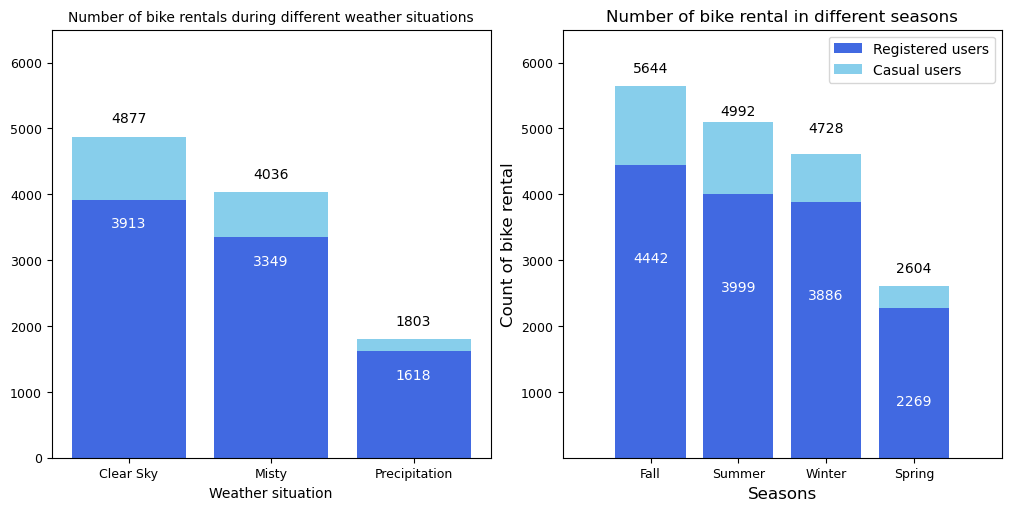

In [39]:
# this dashboard is not presented during the presentation.
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(10, 5 ), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=1, ncols=2, figure=fig)

# Add subplots to the figure
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0, 1])


                    # Define subplot for stacked bar chart (comparing weather sit)
ax2.bar(x_weather_sit, y_registered, label='Registered users', color='royalblue')
ax2.bar(x_weather_sit, y_casual, bottom=y_registered.loc[x_weather_sit], label='Casual users', color='skyblue')

ax2.set_title('Number of bike rentals during different weather situations',fontsize=10)

ax2.set_xlabel('Weather situation', fontsize=10)
ax2.set_ylim([0, 6500])

# Display data labels 
for x, y in zip(x_weather_sit, y_registered + y_casual):
    label = "{:d}".format(int(y))
    ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

    
#display data lab  els for registered users 
for x, y in zip(x_weather_sit, y_registered):
    label = "{:d}".format(int(y))
    ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, -20), ha='center', color = 'white')
    

                    # Define subplot for second stacked bar chart (comparing seasons)
# Create a vertical bar chart using data
ax3.bar(x_seasons, y_registered1, label='Registered users', color = 'royalblue')
ax3.bar(x_seasons, y_casual1, bottom=y_registered1, label='Casual users', color = 'skyblue')


# Set title of the plot and the axes labels
ax3.set_title('Number of bike rental in different seasons')
ax3.set_ylabel('Count of bike rental', fontsize=12)
ax3.set_xlabel('Seasons', fontsize=12)

# Set ranges for the x-axis and y-axis
ax3.set_xlim([-1, len(x_seasons)])
ax3.set_ylim([2, 6500])

# Display data labels for casual users
for x, y in zip(x_seasons, y_bike_rental):
    label = "{:d}".format(int(y))
    ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
#display data lavels for registered users 
for x, y in zip(x_seasons, y_registered1):
    label = "{:d}".format(int(y))
    ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, -70), ha='center', color = 'white')
    
#display legend
ax3.legend()

# Tick size
ax2.tick_params(axis='both', which='both', labelsize=9)
ax3.tick_params(axis='both', which='both', labelsize=9)

                 

This dashboard shows break down to which how the average bike rental changes during different weather conditions and seasons

Overall, from this dashboard, the number of registered users is significantly higher than casual users.The stacked bar graph on the left shows that bike rental for casual and registered users is highest when sky is clear, followed by misty and days with precipitation. Whereas the stacked bar graph on the right shows that fall has the greatest number of bike rental for both  casual and registered users, followed by summer and winter, while spring has the lowest number of bike rentals. 

For the winter season, the number of rental by registered users is similar to the summer season, but the number of rental by casual users is lesser. 

This shows that majority of the ussers prefers to cycle when the sky is clear and during warmer seasons, and most of the casual users are less active during the spring and wet weather days. 




##### 4.3 Temporal analysis of bike rentals for casual and registered users <a id="dashboard3"></a>
 

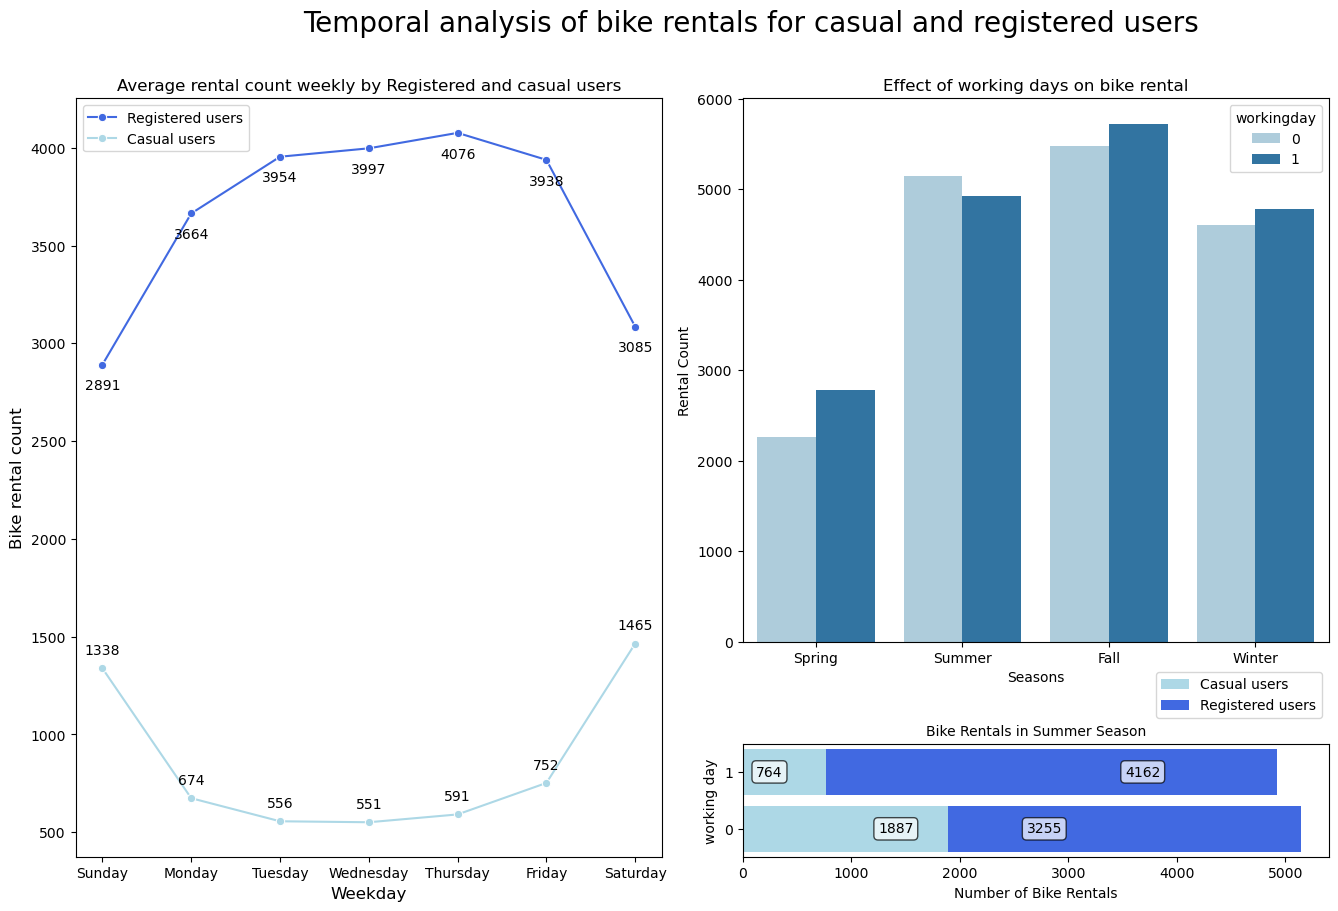

In [40]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15, 9), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=4, ncols=2, figure=fig)

# Add subplots to the figure
ax12 = fig.add_subplot(gs[0:, 0])
ax11 = fig.add_subplot(gs[0:3, 1])
ax = fig.add_subplot(gs[3:, 1])

  # Define third subplot for line graph
    
# create a line plot for registered users 
sns.lineplot(x=weekdays, y=y_registered_week, ax=ax12, marker='o', label='Registered users',color = 'royalblue')

# create a line plot for casual users 
sns.lineplot(x=weekdays, y=y_casual_week, ax=ax12, marker='o', label='Casual users',color = 'lightblue')

# Set plot labels and title
ax12.set_xlabel('Weekday',fontsize = 12)
ax12.set_ylabel('Bike rental count',fontsize = 12)

# add data labels for registered users 
for x, y in zip(weekdays,y_registered_week):
    label = "{:d}".format(int(y))
    ax12.annotate(label, (x, y), textcoords="offset points", xytext=(0, -18), ha='center')
    
# add data labels for casual users 
for x, y in zip(weekdays,y_casual_week):
    label = "{:d}".format(int(y))
    ax12.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
#title
ax12.set_title('Average rental count weekly by Registered and casual users')


                   # Define forth subplot for the effect of working days on the users 

# Use a custom color palette
sns.set_palette("Paired")

# Create a grouped bar chart using Seaborn
sns.barplot(x='season', y='cnt', hue='workingday', data=df, errorbar=None, ax=ax11)

# Set plot labels and title
ax11.set_xlabel('Seasons')
ax11.set_ylabel('Rental Count')
ax11.set_title('Effect of working days on bike rental')

# Display the legend
ax11.legend(title='workingday', loc='upper right')

# Define the bars
bars = ax11.patches
    
    
# # Set title of dashboard
fig.suptitle('Temporal analysis of bike rentals for casual and registered users \n', fontsize=20)

# Create a horizontal stacked bar plot using Matplotlib directly
ax.barh(grouped_data['workingday'], grouped_data['casual'], color='lightblue', label='Casual users')
ax.barh(grouped_data['workingday'], grouped_data['registered'], left=grouped_data['casual'], color='royalblue', label='Registered users')

bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(-50, 0),bbox=bbox_props,
                textcoords='offset points')

# Add labels and title
ax.set_yticks([1, 0])  # Set the y-axis ticks to 0 and 1
ax.set_ylabel('working day')
ax.set_xlabel('Number of Bike Rentals')
ax.set_title('Bike Rentals in Summer Season',fontsize = 10)
ax.legend(bbox_to_anchor=(1, 1.7))


# Display plot
plt.show()

This dashboard shows the bike rental analysis on the average number of bike rental counts across a week and the effect of working days on bike rental by seasons. 

The pattern for registered users reveals a consistent high in bike rentals during weekdays, followed by a decline over the weekends. However, casual users are more active during the weekends, with increased bike rental rates, while weekdays witness a decline in their rental activity. The corresponding bar graph on the right emphasizes that bike rentals are generally higher on working days compared to non-working days for most seasons. 

We can also observe that summer is the only season with higher bike rental counts during non working days. From the stacked bar chart, the higher bike rental on off days could be due to a greater volume of casual users such as tourist untilising our bike rental system.

As such, the company can utilise the summer seasons to organise events or promotions to attract new users. 

##### 4.4 Relationship between bike counts, seasons and weather situation <a id="dashboard4"></a>

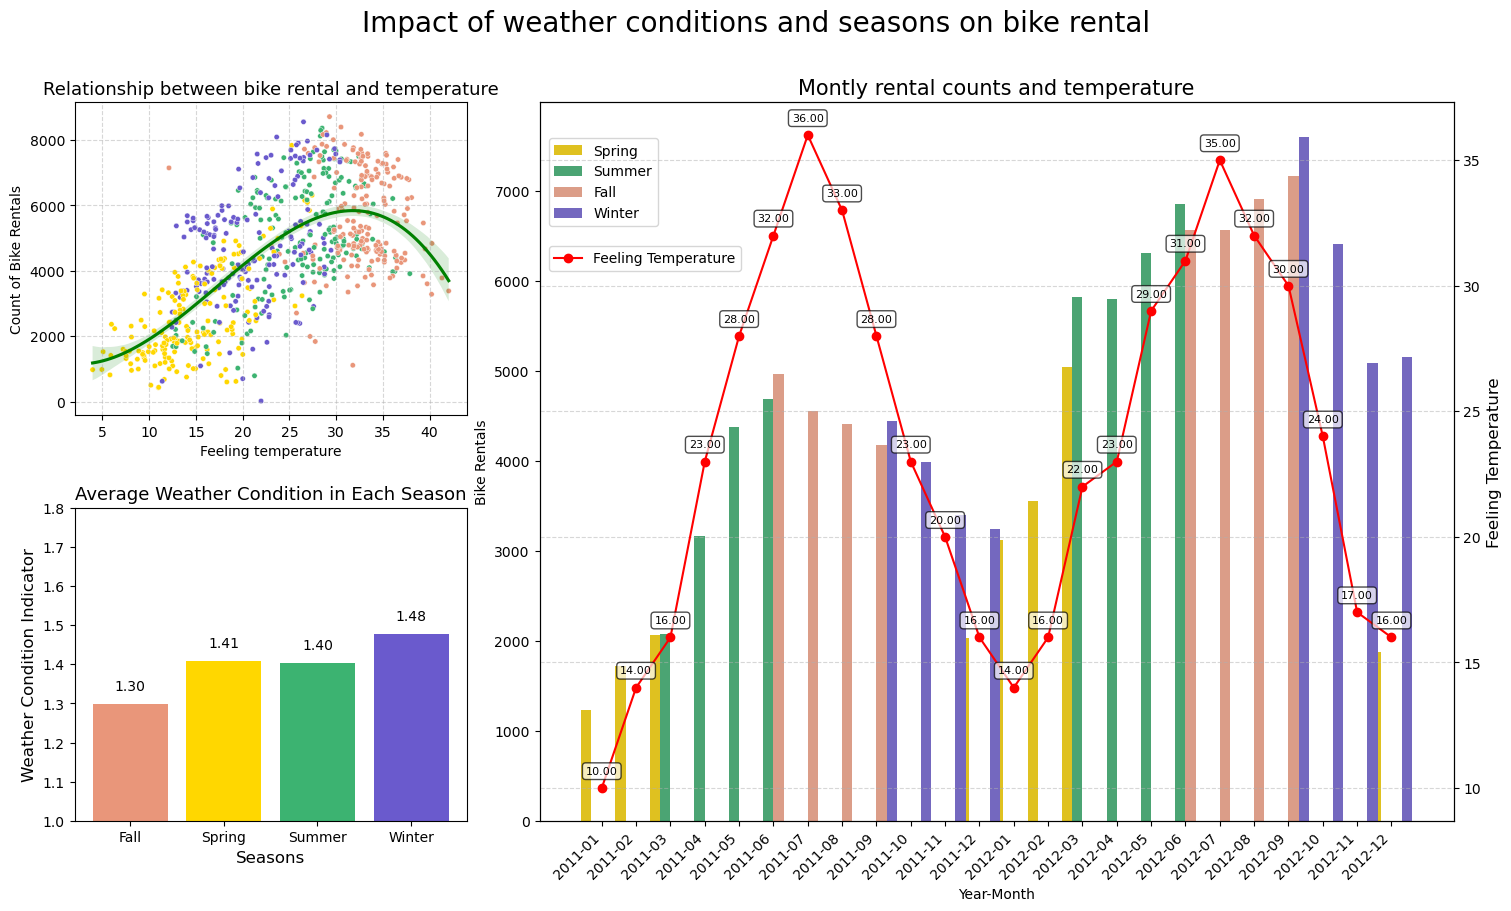

In [41]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,9), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=10, figure=fig)

# Add subplots to the figure

ax1 = fig.add_subplot(gs[0,0:3])
ax4 = fig.add_subplot(gs[1,0:3])
ax13 = fig.add_subplot(gs[0:,3:])


                 # Define first  subplot for scatter graph 

# Create a scatter plot of temperature vs. bike rentals with customized color
sns.scatterplot(ax=ax1, data=df, x='atemp', y='cnt',hue='season',  palette=custom_palette, s=15, label='Data Points')

# Overlay a cubic best-fit line with a different color
sns.regplot(ax=ax1, x='atemp', y='cnt', data=df, order=3, scatter=False, line_kws={'color': 'green', 'label': 'Cubic Fit'})

# Set the title and axis labels
ax1.set_title('Relationship between bike rental and temperature', fontsize=13)
ax1.set_xlabel('Feeling temperature', fontsize=10)
ax1.set_ylabel('Count of Bike Rentals', fontsize=10)

# Remove the legend
ax1.legend().set_visible(False)
ax1.grid(alpha=0.5, linestyle='--')

                 # Define third  subplot for bar graph 
# Set title of the plot and the axes labels
ax4.set_title('Average Weather Condition in Each Season',fontsize = 13)
ax4.set_ylabel('Weather Condition Indicator', fontsize=12)
ax4.set_xlabel('Seasons', fontsize=12)

#set limit
ax4.set_ylim(bottom = 1, top = 1.8)

# Define custom colors for bars
colors = ['darksalmon', 'gold', 'mediumseagreen', 'slateblue']

# Plot the bar graph with custom colors
ax4.bar(x_season, y_AvgWeatherCondition, color=colors)

# Display data labels on the bars
for x, y in zip(x_season, y_AvgWeatherCondition):
    label = "{:.2f}".format(y)
    ax4.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Tick size
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
    
                 # Define fourth subplot for dual graph 
# Define a custom color palette
custom_palette = {'Spring': 'gold', 'Summer':'mediumseagreen', 'Fall': 'darksalmon', 'Winter': 'slateblue'}

# Plot a bar graph using seaborn with color-coded seasons and custom color palette
sns.barplot(x='year_month', y='cnt', hue='season', data=df, ax=ax13, errorbar=None, palette=custom_palette, width=1.2)

# Set title and labels
ax13.set_title('Montly rental counts and temperature',fontsize = 15)
ax13.set_xlabel('Year-Month')
ax13.set_ylabel('Bike Rentals')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Position the legend
ax13.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95), borderaxespad=0.0)

# Create the second y-axis for temperature (as line plot)
ax14 = ax13.twinx()

# Plot temperature data on the second y-axis using Seaborn
ax14.plot(year_month_str, temperature_per_month, marker='o', linestyle='-', color='red', label='Feeling Temperature')

# Set title of the plot and the axes labels
ax14.set_ylabel('Feeling Temperature', fontsize=12)

# Display data labels on the line plot
for x, y in zip(year_month_str, temperature_per_month):
    label = "{:.2f}".format(y)
    # Set translucent border for the labels
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
    ax14.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', bbox=bbox_props,fontsize=8)

# Rotate x-axis labels for better visibility
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=60, ha='right')

ax14.legend(loc='upper left', bbox_to_anchor=(0.01, 0.80), borderaxespad=0.0)

# # Set title of dashboard
fig.suptitle('Impact of weather conditions and seasons on bike rental\n', fontsize=20)
plt.grid(alpha=0.5, linestyle='--')

# Display the plot
plt.show()



This dashboard compares number of bike rentals to temperature and weather condition by seasons.

From the scatter plot, bike rental increases with increasing feeling temperature, reaching a peak at about 30 to 35 degrees, and it declines at temperature beyond 35 degrees. The average temperature at 30 to 35 degrees is most commonly observed during the fall season. Concurrently, fall season also has the lowest average weather indicator. This suggests a higher frequency of clear skies and temperature compared to other seasons. In contrast, winter exhibits a higher average weather indicator, indicating lesser favorable weather conditions.

When comparing the bike rental counts, a clear trend emerges. Bike rentals tend to peak during the fall season, aligning with the favorable weather conditions, while a decline in the number of rentals is typically observed in winter. 

The correlation between temperature and bike rentals further emphasizes this trend. As temperatures rise from 5 degrees to 30 degrees, there is a noticeable increase in average bike rentals.  From examing the scatter plot, the temperature during spring seasons is the lowest, and we can also observe that spring yields the lowest bike rental count among other seasons in the dual axis chart. As such, the low bike rental count in spring can be due to the cold weathers. 

Thus, this indicates a preference for bike rentals during warmer seasons, particularly during the transition between summer and fall and throughout the fall season when clear skies coincide the optimal temperatures of 30 to 35 degrees. This understanding can be valuable for planning promotional activities or events, aligning with user behavior and weather patterns to optimize bike rental services.

-----
# 5. Conclusion <a id="part5"></a>
[Back to top](#top)

In summary, with the objective to improve operation efficiency of Leo Bike Share Co, our delved into the  intricate relationship between the number of bike rentals and various natural factors, leveraging the provided dataset to extract valuable, data-driven insights.

From our exploration, we have concluded that bike rental counts has a close relationship with natural factors, particularly observing more rentals during warmer seasons and favourable weather condition. This also suggests a need to address the drop in the bike rental counts during low demand periods, specifically during the spring season, wet weather days and encourage more bike rentals by casual users. Building upon these findings, we propose the following recommendations:
 
 #### 1. Align Pricings of bike rentals with demand
 - Price of bike rental can be adjusted to be lower to stimulate more bike rental during the spring season or wet weather days. This seeks to increase the number of bike rentals during these less active periods. 
 - During peak seasons such as fall and summer or days with anticipated higher demand due to good weather condition, bike rental prices can be elevated. This strategic pricing approach is aimed maximizing the revenue generation during periods of heightened demand.
 
#### 2. Promotions 
- Introduce weekday promotions offering first-time users with two complimentary rides, encouraging them to register and expand our user base. The two free rides act as a catalyst, fostering a positive cycle that boosts both user benefits and our platform. This drives a sustained increase in weekday rental activity for casual users and grows our registered user community.

#### 3.  Organise community events
- Leo Bike Share can consider working with community centers and organise community events where members of the public will be encouraged to participate in a weekly cycling activity. These cycling activities can take the form of group rides, fostering a sense of community and motivating users to integrate cycling into their weekday routines. With this, we hope to improve the average bike rental rate for casual users during week days, by reaching out to different communities and promote our bike rental system.

#### 4. Marketing and Promotion strategy
- Given the higher engagement of casual users on weekends,  we recommend events to be held or promoted during weekends to further engage this user segment. This approach aims to attract more casual users, expanding our userbase. Furthermore,  since off days rentals are higher during summer and overall bike rental is more during fall, these two seasons can be our targeted timeframe. 

#### 5.  Provision of weather appropriate gear at bike rental stations
- Noticing a significant decrease in bike rentals during days with preciptation, our company can implement vending machines at bike rental stations that sell rain gear, including raincoats, umbrellas, and disposable seat covers. Users who purchase rain gear from these machines and rent bikes at the station could be eligible for discounts. This initiative aims to encourage users to choose bike rentals for commuting even during wet weather conditions, thus improving the overall bike renting counts during misty and precipitation days. 

(edited after presentation) 

-----
# 6. Reflection <a id="part6"></a>
[Back to top](#top)


### Research (using Gen AI and Google search) and compare results on whether Mode Analytics is the market leader in 2023

##### findings: 
Google Search:  
- A market leader refers to a company that holds the largest market share within an industry. They can influence the competitive environment and the overall market direction. Market leaders often  pioneer the development of certain products or services. 
- According to Statista, Mode Analystics is the top business intelligence platform in 2023, beating other BI platforms such as Tableau and PowerBI. In 2023, Mode Analytics has generated 24.43% of the total market share, followed by Tableau with 13.17% and Power BI with 12.42%.
- Mode analytics is the first business intelligence platform to introduce collaboration among teams, incorporating various data tools to enhance its overall effectiveness. 

BingChat: 
- When I used Microsoft bing to research for the market leader in 2023, they placed their focus on Microsoft Power BI, claiming that it is the leader as it was recognised as a leading business intelligence platfrom in Gartner's Magic Quadrant 2023. However, it is not directly answering my question as Gartner's report is published in Jan 2023, which means that the ranking based on data that is before 2023. This shows that Microsoft bing is showing a bias to Microsoft, it's creator.

ChatGPT:
- When seeking information from ChatGPT, I encountered limitations due to its knowledge cutoff in January 2023. As such,this shows that some AI models may not have access to the most updated data and their judgements may not be supported with sufficient evidence, affecting the reliability and currency of the information provided by these tools.




### Reflect on 
- i. Reliability and Accuracy : In what ways could the information provided by Gen AI be inaccurately representation of factual data, how can users critically assess and verify the information provided by these tools? 
- ii. Understanding and Mitigating Flaws: Considering the known flaws in Gen AI such as susceptibility to biases, hallucination and the production of plausible but incorrect information, what strategies or practices can mitigate the risks associated with relying AI- generated content?


##### reflection: 
i. Generative AI is trained using hugh amounts of datasets, and the quality and accuracy of the information it generate depends on the depth and diversity of the training data. As Generative AI is not specialised in a specific field, it is trained on a broad range of topics. However, this results to it only having a surface-level understanding rather than deep expertise in particular subjects. Moreover, the quality of the information provided by Gen AI can also be affected if there is any bias within the training data. Output responses by Generative AI could also be affected when it misinterpret the user's prompt. 

To critically assess and verify information provided by these tools, we should compare the information generated by Generative AI with current and reliable sources online. Information generated by gen ai is only reliable when it is supported by external sources. 

ii. Recognising the flaws within Gen AI, one strategy to mitigate the risk is to avoid over reliance develop a habit of evaluating AI contents critically. We should not view AI generated contents with absolute authority and validate the information with external credible sources whenever possible. 

When we notice any inaccurate or biased information provided by AI, we should also provide feedbacks to developers or platform administrators to highlight the issue so that the developers can make necessary changes or improvements to the system. 



-----
# 7. References <a id="part7"></a>
[Back to top](#top)   

OpenAI. (2024). ChatGPT (3.5) [Large language model]. https://chat.openai.com

Is a humidity of zero percent possible? (2021, September 13). Weather Blog. Retrieved February 3, 2024, from https://wgntv.com/weather/weather-blog/is-a-humidity-of-zero-percent-possible/

Kenton, W. (2022, December 20). What is a market leader? Defintion, traits, and examples. Investopedia. https://www.investopedia.com/terms/m/market-leader.asp#:~:text=A%20market%20leader%20typically%20enjoys,%2C%20promotional%20spending%2C%20and%20profit.

About us | Mode. (n.d.). https://mode.com/about-us